# Top

In [1]:
# import albumentations
import torchvision
import torchvision.transforms as transforms

In [2]:
import random

import numpy as np
import torchvision.transforms as transforms
from IPython.display import display
from PIL import Image

1.[DataAugumentationに飛ぶ](#1)

## 連続して行うTransform
* Compose

In [3]:
train_transforms = transforms.Compose( #複数のTransfromを連続して行う
            [
                
                transforms.Resize((256,256)),
                
            ]



)

## 複数のTransformを指定した確率で行う
* RandomApply

In [4]:
transform = transforms.RandomApply(
    [
        transforms.Resize(256),
        transforms.ToTensor(),
    ],
    p = 0.5,
)

## 複数のTransformから1つを選択して行うTransform
* RandomChoice

In [5]:
transform = transforms.RandomChoice(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
    ]

)

## 複数のTransformをランダムに順番を入れ替えて行う
* RandomOrder

In [6]:
transform = transforms.RandomChoice(
    [
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
    ]

)

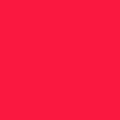

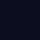

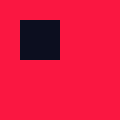

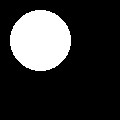

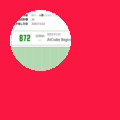

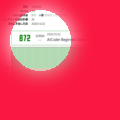

In [7]:
im = Image.new("RGB", (120,120),(250,23,65))
display(im)
im2 = Image.new("RGB",(40,40),(12,14,31))
display(im2)
back = im.copy()
back.paste(im2,(20,20)) # イコールにしちゃだめなだけ！
display(back)

from PIL import Image, ImageDraw, ImageFilter
# mask
score = transforms.Resize(back.size)(Image.open('score.png'))
sc = score.copy()
mask = Image.new("L", sc.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((10,10,70,70), fill=255)
display(mask)
bk = im.copy()
bk.paste(sc, (0,0), mask)
display(bk)

maskblur = mask.filter(ImageFilter.GaussianBlur(10))
bkbl = bk.copy()
bkbl.paste(sc, (0,0), maskblur)
display(bkbl)

In [30]:
def tile_imgs(imgs, n_cols=3):
    """同じ大きさの複数枚の画像をタイル上に並べる。
    """
    n_rows = int(np.ceil(len(imgs) / n_cols))
    w, h = imgs[0].size
    print(imgs[0])
    # 結合後の画像
    # https://note.nkmk.me/python-pillow-basic/
    # im = Image.new("RGB", (512, 512), (128, 128, 128))
    concat_img = Image.new("RGB", (w * n_cols, h * n_rows))
    # from IPython.display import display
    for i, img in enumerate(imgs):
        row, col = i % n_cols, i // n_cols
        concat_img.paste(img, (w * row, h * col))
        # https://note.nkmk.me/python-pillow-paste/
        # ベース画像のpaste()メソッドの引数に貼り付ける画像を指定する。
        # im1.paste(im2)
        # つまり、そういうことか、
        # Image.new("RGB", (W,H))で新しいのを作って！
        # .paste(img, (W,H))で画像を上からくっつけるんだ！
    return concat_img

In [31]:
img = np.array(Image.open('score.png'))

In [32]:
img.shape

(650, 742, 4)

In [33]:
# tile_imgs(img)

## Pad (Paddingを行う)

* Pad(padding, fill=0, padding_mode='constant')

In [34]:
data = np.arange(1,5,dtype=np.uint8).reshape(2,2)
img = Image.fromarray(data)
transform = transforms.Pad(padding=(1,2))
print(*np.array(transform(img)),sep='\n')
transform = transforms.Pad(padding=(2,1,2,1)) # 左上下右
print(np.array(transform(img)))
# padding_mode
# constant : fillに指定した色で埋める
# edge : 一番近い色で埋める
# reflect : 画像の端で折り返す
# symmetric : 画像の端で折り返す。
transform = transforms.Pad(padding=2, padding_mode = "symmetric", fill = 0)
print(np.array(transform(img)))

[0 0 0 0]
[0 0 0 0]
[0 1 2 0]
[0 3 4 0]
[0 0 0 0]
[0 0 0 0]
[[0 0 0 0 0 0]
 [0 0 1 2 0 0]
 [0 0 3 4 0 0]
 [0 0 0 0 0 0]]
[[4 3 3 4 4 3]
 [2 1 1 2 2 1]
 [2 1 1 2 2 1]
 [4 3 3 4 4 3]
 [4 3 3 4 4 3]
 [2 1 1 2 2 1]]


## CenterCrop 画像の中心を切り抜く

(742, 650)
(200, 200)


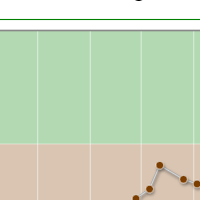

In [35]:
img = Image.open('score.png')
print(img.size)
CenCro = transforms.CenterCrop(200) # 
img = CenCro(img)

print(img.size)
img

## FiveCrop
* 4炭及び中心の5カ所を切り抜く

<PIL.Image.Image image mode=RGBA size=25x25 at 0x2629A6FD490>


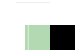

In [36]:
img = Image.open('score.png')
FiCr = transforms.FiveCrop(25)
imgs = FiCr(img)
tile_imgs(imgs)

## TenCrop
* size
* 元の、左右反転、4炭及び中心の計10か所


<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=742x650 at 0x2629A729D90>
<PIL.Image.Image image mode=RGBA size=50x50 at 0x2629A27D640>


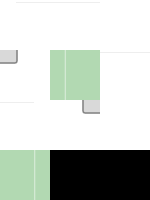

In [38]:
img = Image.open('score.png')
TeCr = transforms.TenCrop(50) # サイズに合わせて
imgs = TeCr(img)
print(img)
tile_imgs(imgs)

## Resize
* Resize(size, interpolation=2)
    * PIL.Image.NEAREST: 最近傍補間
    * PIL.Image.BILINEAR: バイリニア補間
    * PIL.Image.BICUBIC: バイキュービック補間
    * PIL.Image.LANCZOS: Lanczos 補間

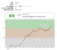

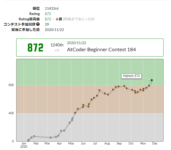

In [48]:
img = Image.open('score.png')
ReS = transforms.Resize(50) # サイズに合わせて
display(ReS(img))
ReS = transforms.Resize(150) # サイズに合わせて
display(ReS(img))

## Grayscale グレースケール変換を行うTransform
* num_output_channels
    * 出力のチャンネル数
    * カラーなら3で

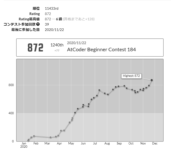

In [49]:
img = Image.open('score.png')
Gray = transforms.Grayscale()
display(ReS(Gray(img)))

# Image Augmentation

<a id="1"></a>

## RandomCrip
* size, padding,
* pad_if_needed : sizeに指定した大きさが画像より大きい場合にパディングするかどうか
* fill : 色 constantにしたときね
* padding_mode = 'constant, edge, reflect, symmetric'

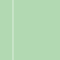

In [50]:
img = Image.open('score.png')
RdC = transforms.RandomCrop(60, pad_if_needed=True)
display(RdC(img))

## RandomResizedCrop
* size, scale : 変動幅 スケールはuniform(scale[0], scale[1]で決める
* aspect アスペクト比
* interpolation
* 

$$ \begin{eqnarray} nw \times nh &=& (w \times h) * scale \\ \frac{nw}{nh} &=& ratio \end{eqnarray} $$

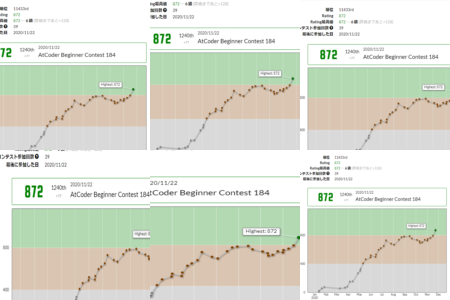

In [51]:
img = Image.open('score.png')
random.seed(42) # All answer is 42
RaReCr = transforms.RandomResizedCrop(150, scale=(0.05, 3), ratio = (3/4, 4/3))
# range should be of kind (min, max)
imgs = [RaReCr(img) for _ in range(6)]
tile_imgs(imgs)

## ColorJitter
* ランダムに明るさ、コントラスト、彩度、色相を変化させるTransform
* brightness, contrast, saturation, hue
* saturation : 彩度 value * uniform(max(0, 1-saturation), 1+saturation)で決める
* hue 色相の変動幅

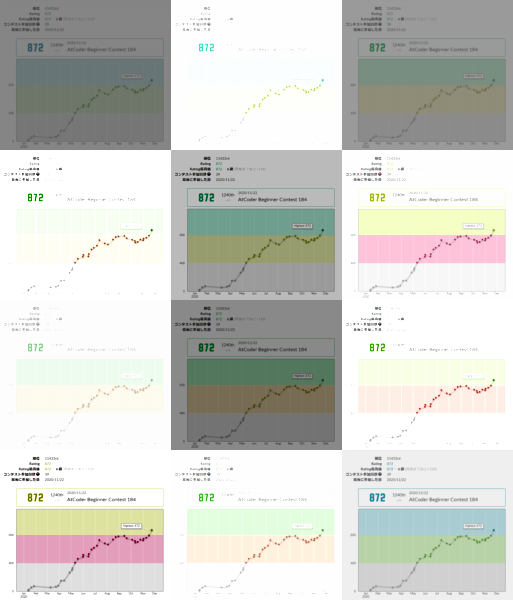

In [52]:
img = Image.open("score.png")
random.seed(0)
CoJi = transforms.ColorJitter(brightness=0.5, contrast = 0.5, saturation = 0.5, hue = 0.2)
imgs = [CoJi(ReS(img)) for _ in range(12)]
tile_imgs(imgs, n_cols = 3)

## RandomGrayscale
* ランダムにグレースケール変換
* RandomGrayscale(p = 0.3) : p = 確率

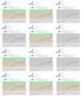

In [53]:
img = Image.open('score.png')
random.seed(0)
RandomGrays = transforms.RandomGrayscale(p = 0.5)
imgs = [RandomGrays(transforms.Resize(24)(img)) for _ in range(12)]
tile_imgs(imgs)

## RandomHorizontalFlip
* ランダム左右反転

In [54]:
transforms.RandomHorizontalFlip(p = 0.3)

RandomHorizontalFlip(p=0.3)

## RandomVerticalFlip
* ランダムに上下反転

In [55]:
transforms.RandomVerticalFlip(p = 0.3)

RandomVerticalFlip(p=0.3)

## RandomAffine
* ランダムにアフィン返還を粉う
* degrees 回転角度
* translate : x, y方向[0][1]
* scale
* shear せん断 : はさみなどを使って挟み切るように、物体や流体の内部の任意の面に関して面に平行方向に力が作用すること
* resample(int) 
* fillcolor

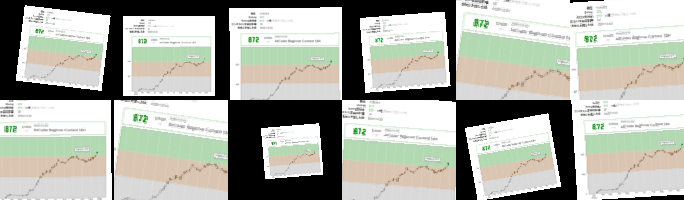

In [56]:
img = Image.open("score.png")
random.seed(0)

RA = transforms.RandomAffine(
    degrees=[-10,10],
    translate=(0.1, 0.1),
    scale=(0.5,1.5),
    # shear=0.2,
)
imgs = [RA(transforms.Resize(100)(img)) for _ in range(12)]
tile_imgs(imgs, n_cols=6)

## RandomPerspective
* 射影変換
* 次元に及ぶ　立体的に見えるぜ
* RandomPerspective(distortion_scale=0.5, p =0.5, interpolation=3, fill=0)
* distortion_scale : 歪ませる幅
* interpolation 保管方法
* fill 色

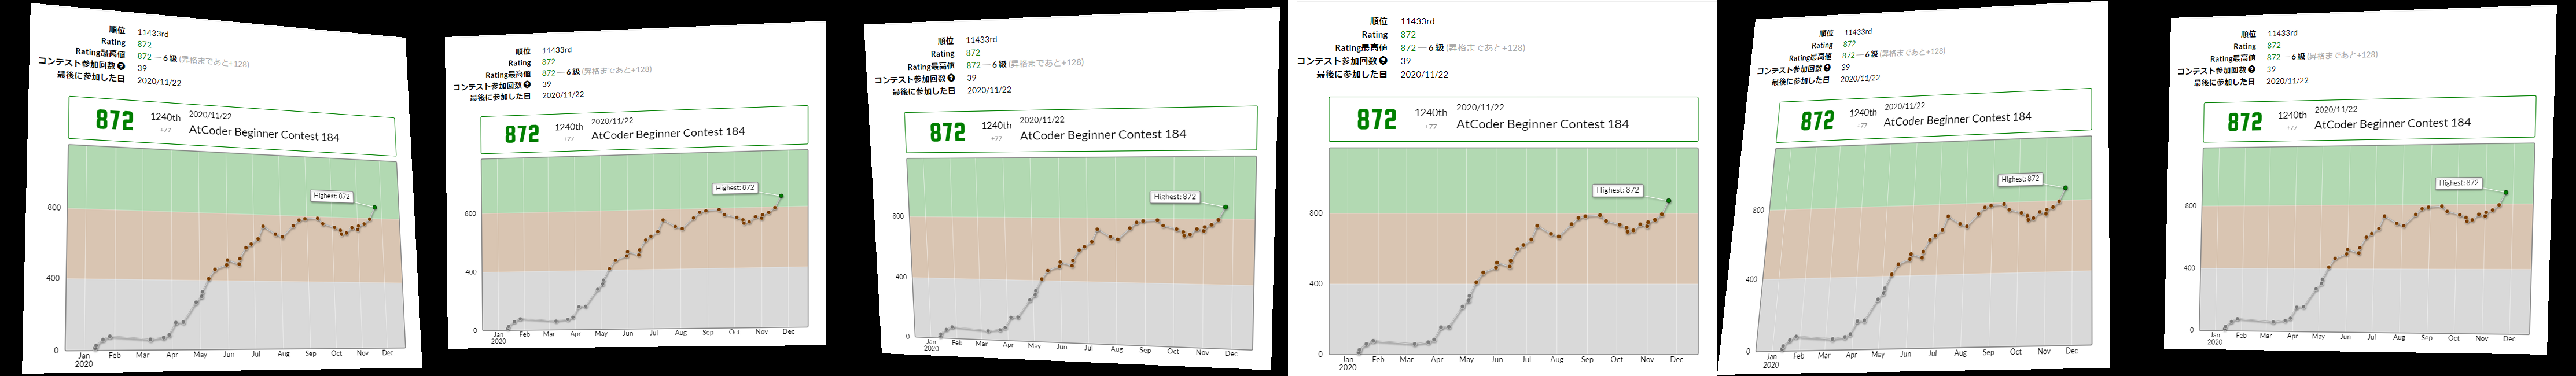

In [57]:
img = Image.open('score.png')
random.seed(0)
RP = transforms.RandomPerspective(distortion_scale=0.2, p = 0.9)
imgs = [RP(img) for _ in range(6)]
tile_imgs(imgs, n_cols=6)

## RandomRotation
* ランダムに回転を行う
* degrees
* resample
* expand 回転した際にすべての画素が収まるように調整するか
* center 回転する中心
* fill 外挿する時の色

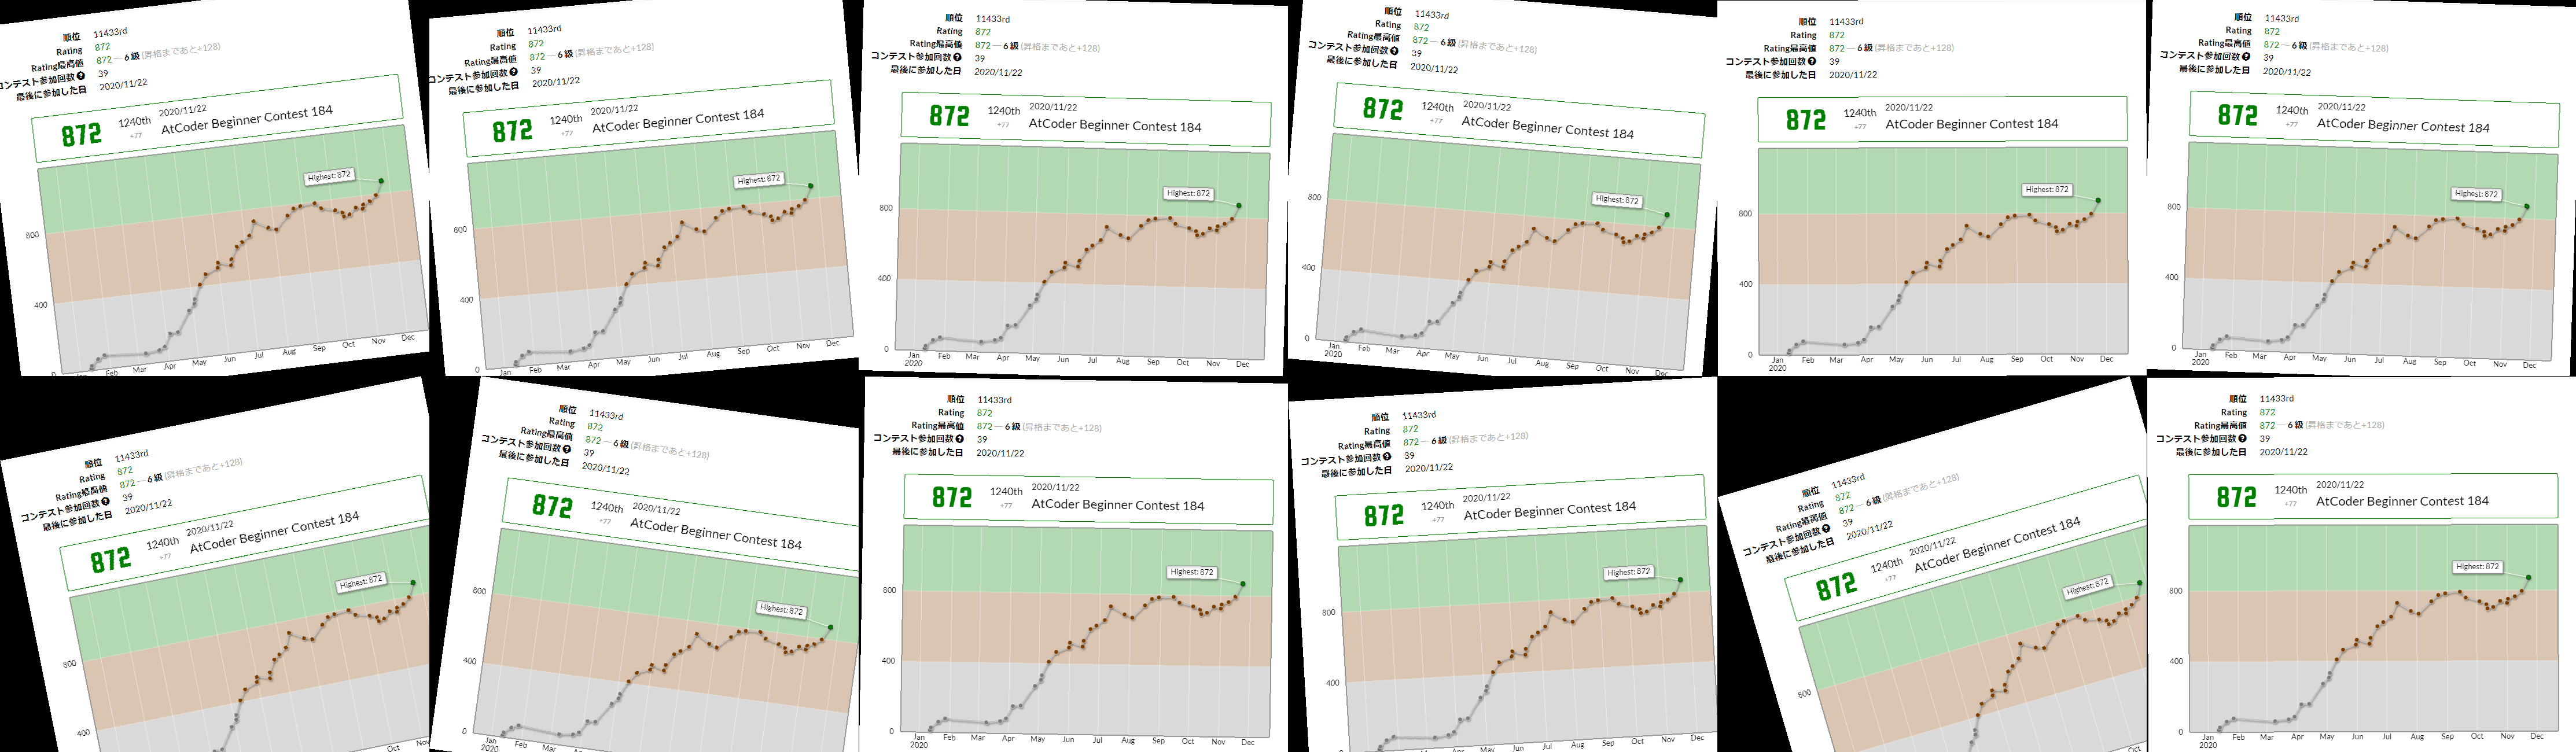

In [58]:
img = Image.open('score.png')
random.seed(0)

RaRo = transforms.RandomRotation(degrees = 10)

img1 = [RaRo(img) for _ in range(6)]

RaRo = transforms.RandomRotation(degrees = 20, expand = True)

img2 = [RaRo(img) for _ in range(6)]
imgs = img1 + img2
tile_imgs(imgs,n_cols = 6)

# Transform For Tensor

## LinearTransform
* 線形変換を行います
* transformation_matrix (Tensor) – tensor [D x D], D = C x H x W

* mean_vector (Tensor) – tensor [D], D = C x H x W

In [65]:
import torch

In [77]:
tensor = torch.ones((2,))
transforms.LinearTransformation(tensor.new_full((2,2), -0.5), tensor.new_full((2,2), -0.5))
# なんやこれ？

LinearTransformation(transformation_matrix=[[-0.5, -0.5], [-0.5, -0.5]]), (mean_vector=[[-0.5, -0.5], [-0.5, -0.5]])

## Normalize
* 正規化を行う チャンネルごとに標準化をします。
$$ output_{c} = \frac{input_{c}-m_{c}}{s_{c}} $$

In [79]:
Nor = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

## RandomErasing
* ランダムに選択した領域を除去

## ToPILImage
* Tensor to PIL Image

In [82]:
ToPIL = transforms.ToPILImage(mode = None)
# modeは変換後の形式 ないなら推定

In [84]:
# toImg = ToPIL(img) errorが出る picなので
# print(toImg)

## ToTensor
* PIL Image to Tensor
* これは必要

In [85]:
transforms.ToTensor()

ToTensor()

## 自作のTransform 
* Lambda(function)
* ガウシアンフィルターを加えたりね

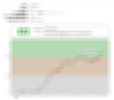

In [91]:
from PIL import ImageFilter
img = Image.open("score.png")

def blur(img):
    # Gaussian Filter
    return img.filter(ImageFilter.BLUR)

BL = transforms.Lambda(blur)
img = BL(transforms.Resize(100)(img))
img

# ALL Code Summary

In [ ]:
train_transforms = transforms.Compose( #複数のTransfromを連続して行う
            [
                
                transforms.Resize((256,256)),
                
            ]
)

from PIL import Image, ImageDraw, ImageFilter
from IPython.display import display
im = Image.new("RGB", (120,120),(250,23,65))
im2 = Image.new("RGB",(40,40),(12,14,31))
score = transforms.Resize(back.size)(Image.open('score.png'))
maskblur = mask.filter(ImageFilter.GaussianBlur(10))
bk = im.copy()
bk.paste(sc, (0,0), mask)
bkbl = bk.copy()
bkbl.paste(sc, (0,0), maskblur)
display(bkbl)

concat_img = Image.new("RGB", (w * n_cols, h * n_rows))
concat_img.paste(img, (w * row, h * col))

img = np.array(Image.open('score.png'))

transform = transforms.Pad(padding=(2,1,2,1)) # 左上下右
transform = transforms.Pad(padding=2, padding_mode = "symmetric", fill = 0)
CenCro = transforms.CenterCrop(200) # 
FiCr = transforms.FiveCrop(25)
TeCr = transforms.TenCrop(50) # サイズに合わせて
ReS = transforms.Resize(150) # サイズに合わせて
Gray = transforms.Grayscale()
RdC = transforms.RandomCrop(60, pad_if_needed=True)
RaReCr = transforms.RandomResizedCrop(150, scale=(0.05, 3), ratio = (3/4, 4/3))
CoJi = transforms.ColorJitter(brightness=0.5, contrast = 0.5, saturation = 0.5, hue = 0.2)
RandomGrays = transforms.RandomGrayscale(p = 0.5)
transforms.RandomHorizontalFlip(p = 0.3)
transforms.RandomVerticalFlip(p = 0.3)
RA = transforms.RandomAffine(
    degrees=[-10,10],
    translate=(0.1, 0.1),
    scale=(0.5,1.5),
    # shear=0.2,
)
RP = transforms.RandomPerspective(distortion_scale=0.2, p = 0.9)
RaRo = transforms.RandomRotation(degrees = 20, expand = True)
transforms.LinearTransformation(tensor.new_full((2,2), -0.5), tensor.new_full((2,2), -0.5))
Nor = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
ToPIL = transforms.ToPILImage(mode = None)
transforms.ToTensor()

# - - -
from PIL import ImageFilter
img = Image.open("score.png")

def blur(img):
    # Gaussian Filter
    return img.filter(ImageFilter.BLUR)

BL = transforms.Lambda(blur)
img = BL(transforms.Resize(100)(img))
img